In [1]:

import dialogue_graph as dg
from dotenv import load_dotenv
from langchain_core.language_models.llms import LLM
import iconic_tools.langchain as models
import matplotlib.pyplot as plt
from metrics import features, metrics, metrics_utils
import numpy as np
import os
import re
import copy


load_dotenv()

model = models.InstructGPT4(temperature=0, max_tokens=4096)

# Data definitions

In [5]:
initial_state_given = dg.Dialogue(
    nodes=[],
    edges={},
    goals=["[goal]: Odysseus tries to persuade Achilles to fight in Troy without prompting him to anger.\n",
           "[goal]: Achilles evidences his discomfort about fighting for Agamemnon.\n",
           "[goal]: Achilles does not disclose any decision about fighting in Troy.\n",],
    facts=["""
            [lore]: It's 1250 BC, Achilles is a mighty warrior in Greece, he has fought many times for King Agamemnon, who is uniting the Greek kingdoms.
            [lore]: Achilles has always battle in fights between different Greek kingdoms, but he has never fought against the Trojans, nor he has any quarrel with them.
            [lore]: Odysseus is the king of Ithaca, a small island in Greece, he is known for his cunning and intelligence.
            [lore]: Odysseus is a good friend of Achilles, one of the few he has.
            [lore]: Patroclus is Achilles's dear younger cousin.
            [lore]: Patroclus parents died when he was young, and Achilles has taken care of him since then.
            [lore]: Prince Hector of Troy and his brother Paris were negotiating a peace treaty with Menelaus, King of Sparta and brother of Agamemnon.
            [lore]: Paris has an affair with Menelaus' wife, Queen Helen, and he had smuggled her aboard his home-bound vessel.
            [lore]: Menelaus is furious and demanded that his brother Agamemnon help him get his wife back.
            [lore]: Agamemnon called all the Greek kingdoms to help them fight against Troy.
            [lore]: Achilles is known to be the best warrior in Greece.
            [lore]: Ajax is another great warrior, known for his strength.
            [lore]: Prince Hector is the best warrior in Troy.
            [lore]: Patroclus and Odysseus haven't met before.
           
            [facts, Achilles]: Achilles expects Agamemnon making a move to lure him to fight the Trojans, but he thinks the King of Kings is too proud to beg to Achilles.
            [facts, Achilles]: Achilles despise Agamemnon. He believes that Agamemnon is not nshowing him the respect and recognition he deserves.
           
            [facts, Odysseus]: Agamemnon has sent Odysseus to talk to Achilles and convince him to fight for the Greeks.
            [facts, Odysseus]: The Greeks are assembling the biggest fleet ever to sail to Troy.
            [facts, Odysseus]: All great warriors from Greece are going to fight in Troy, only Achilles remains undecided.
            [facts, Odysseus]: The Greek fleet parts in three days.
            [facts, Odysseus]: Agamemnon and Achilles have a long history of disagreements.
            [facts, Odysseus]: Achilles is very temperamental but wants to be forever remembered as an invincible warrior.
            [facts, Odysseus]: Odysseus is a good friend of Achilles.
            [facts, Odysseus]: Odysseus knew Patroclus parents and was a friend of them as well.
           
            [setting]: The scene is set in the ruins of an ivy-covered temple on a cliff above the sea, where Achilles is sparring with his cousin Patroclus.
            [setting]: The temple is surrounded by a small forest of olive trees. It is morning time.
            [setting]: Both men wield wooden practice swords. Achilles is teaching some combat lessons to his young cousin.
            [setting]: The scene starts with Achilles and Patroclus sparring.
            [setting]: There are some spears next to where they are training.
            [setting]: Odysseus arrives on horseback, accompanied by a small group of soldiers.
            [setting]:  Achilles' foot curls around the wood shaft of one of the spears lying on the ground. In one impossibly fast motion, he flips the spear into the air with his foot, catches it, and throws in the opposite direction from where he was looking. The spear lands right next to the group of warriors that just arrived.
            [setting]:  Most warriors raise shields confused and alerted, they stay behind, but Odysseus approaches while laughs friendly.
            
            """
       
    ],
    comm_style=[
        """
            [driver, Achilles]: Achilles is hungry for glory. His deepest desire is to be remembered as the best warrior that ever existed.
            [driver, Achilles]: Achilles is sick of fighting for Agamemnon, he doesn't want to keep being his mercenary.
            [driver, Achilles]: To protect Patroclus from any danger.
            [style, Achilles]: Achilles boats and brags, he would not let anyone believe there is a better warrior than him.
            [style, Achilles]: Achilles is very temperamental, he can get angry easily.
            [style, Achilles]: He likes to taunt.
            [style, Achilles]: He is full of pride and self-confidence.
            [style, Achilles]: Defiant and rebellious.
            [style, Achilles]: He is well-educated, he can talk politely.

            [driver, Odysseus]: Odysseus wants to convince Achilles to fight in Troy.
        """
    ],
)
def process_troy_transcripts(folder_path='murrays_work/transcripts/troy'):
    # Part 1: Create dictionary of file contents
    initial_states = [initial_state_given]
    transcript_dict = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r') as file:
                # Read content and remove empty lines
                content = [line.strip() for line in file if line.strip()]
            transcript_dict[filename] = content
    # Part 2: Pair chats and create dataset
    troy_dataset = {}
    for filename, content in transcript_dict.items():
        match = re.match(r'transcript_(\d+)_(\d+)\.txt', filename)
        if match:
            pair_num, chat_num = map(int, match.groups())
            key = f'context_{pair_num}_t_{chat_num}'
            
            
            troy_dataset[key] = (initial_state_given,  # Replace None with initial_states[pair_num] if you have initial states
                 dg.DialogueState(chat_history=content)
                )
    
    return troy_dataset


troy_dataset = process_troy_transcripts()


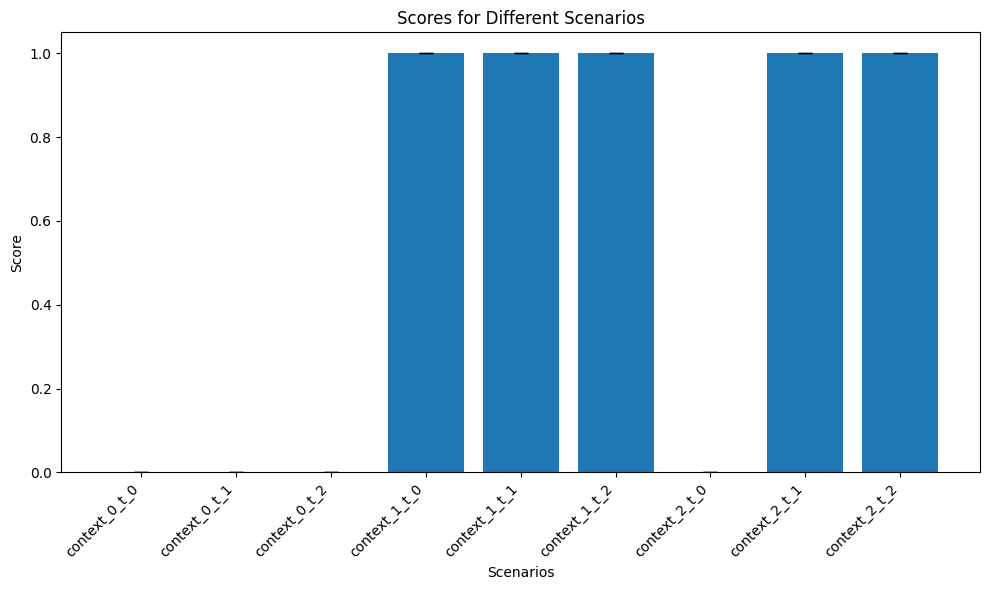

In [6]:
metrics_utils.graph_metric_stats(troy_dataset, model, metrics.precision, n_samples=3)

--------New Call---------
state_str <dialogue_state_start>
<facts_start>

            [lore]: It's 1250 BC, Achilles is a mighty warrior in Greece, he has fought many times for King Agamemnon, who is uniting the Greek kingdoms.
            [lore]: Achilles has always battle in fights between different Greek kingdoms, but he has never fought against the Trojans, nor he has any quarrel with them.
            [lore]: Odysseus is the king of Ithaca, a small island in Greece, he is known for his cunning and intelligence.
            [lore]: Odysseus is a good friend of Achilles, one of the few he has.
            [lore]: Patroclus is Achilles's dear younger cousin.
            [lore]: Patroclus parents died when he was young, and Achilles has taken care of him since then.
            [lore]: Prince Hector of Troy and his brother Paris were negotiating a peace treaty with Menelaus, King of Sparta and brother of Agamemnon.
            [lore]: Paris has an affair with Menelaus' wife, Queen Hel

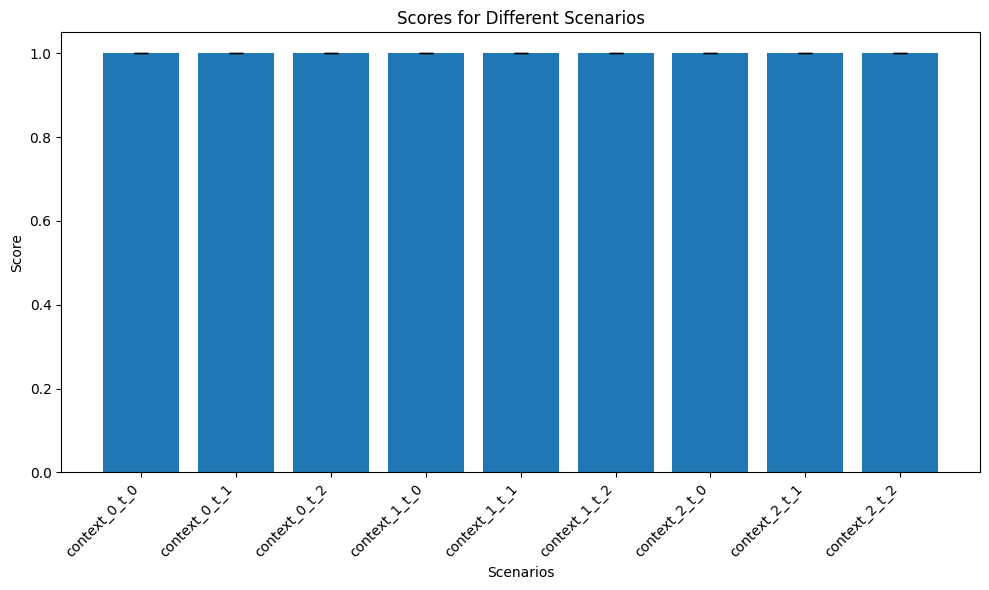

In [17]:
metrics_utils.graph_metric_stats(troy_dataset, model, metrics.synergy, n_samples=3)

--------New Call---------
state_str <dialogue_state_start>
<facts_start>

            [lore]: It's 1250 BC, Achilles is a mighty warrior in Greece, he has fought many times for King Agamemnon, who is uniting the Greek kingdoms.
            [lore]: Achilles has always battle in fights between different Greek kingdoms, but he has never fought against the Trojans, nor he has any quarrel with them.
            [lore]: Odysseus is the king of Ithaca, a small island in Greece, he is known for his cunning and intelligence.
            [lore]: Odysseus is a good friend of Achilles, one of the few he has.
            [lore]: Patroclus is Achilles's dear younger cousin.
            [lore]: Patroclus parents died when he was young, and Achilles has taken care of him since then.
            [lore]: Prince Hector of Troy and his brother Paris were negotiating a peace treaty with Menelaus, King of Sparta and brother of Agamemnon.
            [lore]: Paris has an affair with Menelaus' wife, Queen Hel

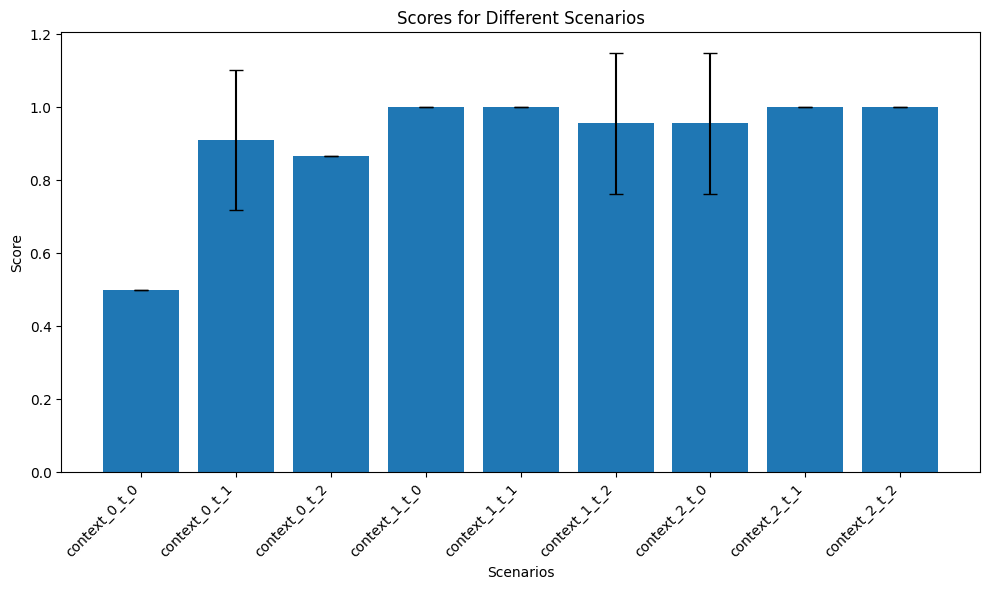

In [16]:
metrics_utils.graph_metric_stats(troy_dataset, model, metrics.impersonation, n_samples=3, evaluated_actor="Achilles")